# UPLOADING THE DATASET

In [1]:
import pandas as pd
github_links = {
    "blinkit_orders.csv": "https://raw.githubusercontent.com/AdityaAryan5/DAI-101_Assignment01/main/blinkit_orders.csv",
    "blinkit_order_items.csv": "https://raw.githubusercontent.com/AdityaAryan5/DAI-101_Assignment01/main/blinkit_order_items.csv",
}

dataframes = {}
for file, url in github_links.items():
    try:
        dataframes[file] = pd.read_csv(url)
        print(f"Loaded: {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

print("LOCK AND LOADED.")

Loaded: blinkit_orders.csv
Loaded: blinkit_order_items.csv
LOCK AND LOADED.


# MULTIVARIATE ANALYSIS

# STATS

# Correlation Matrix for Orders

In [3]:
orders = dataframes["blinkit_orders.csv"]
order_items = dataframes["blinkit_order_items.csv"]

print("\n Correlation Matrix for Orders:")
display(orders.select_dtypes(include=['number']).corr())




 Correlation Matrix for Orders:


,order_id,customer_id,order_total,delivery_partner_id,store_id
order_id,1.000000,-0.008466,-0.008168,0.006545,-0.007966
customer_id,-0.008466,1.000000,0.034951,-0.020232,0.002190
order_total,-0.008168,0.034951,1.000000,-0.003443,-0.023544
delivery_partner_id,0.006545,-0.020232,-0.003443,1.000000,0.007138
store_id,-0.007966,0.002190,-0.023544,0.007138,1.000000


# Correlation Matrix for Order Items

In [ ]:
print("Correlation Matrix for Order Items:")
display(order_items.select_dtypes(include=['number']).corr())


Correlation Matrix for Order Items:


,order_id,product_id,quantity,unit_price
order_id,1.000000,-0.009363,0.009438,-0.007544
product_id,-0.009363,1.000000,-0.003734,-0.111098
quantity,0.009438,-0.003734,1.000000,0.019686
unit_price,-0.007544,-0.111098,0.019686,1.000000


# CORRELATION MATRIX

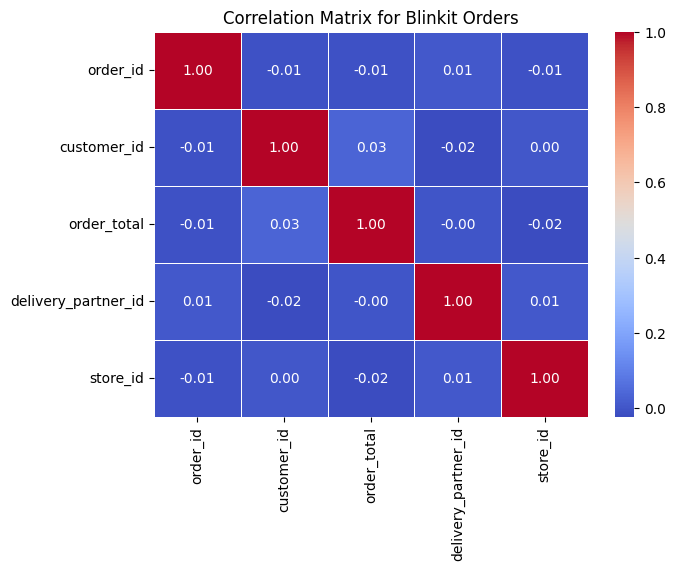

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_col = orders.select_dtypes(include=['number'])

corr_matrix = numeric_col.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Blinkit Orders")
plt.show()


# PAIR PLOT (MATRIX SCATTERPLOT)


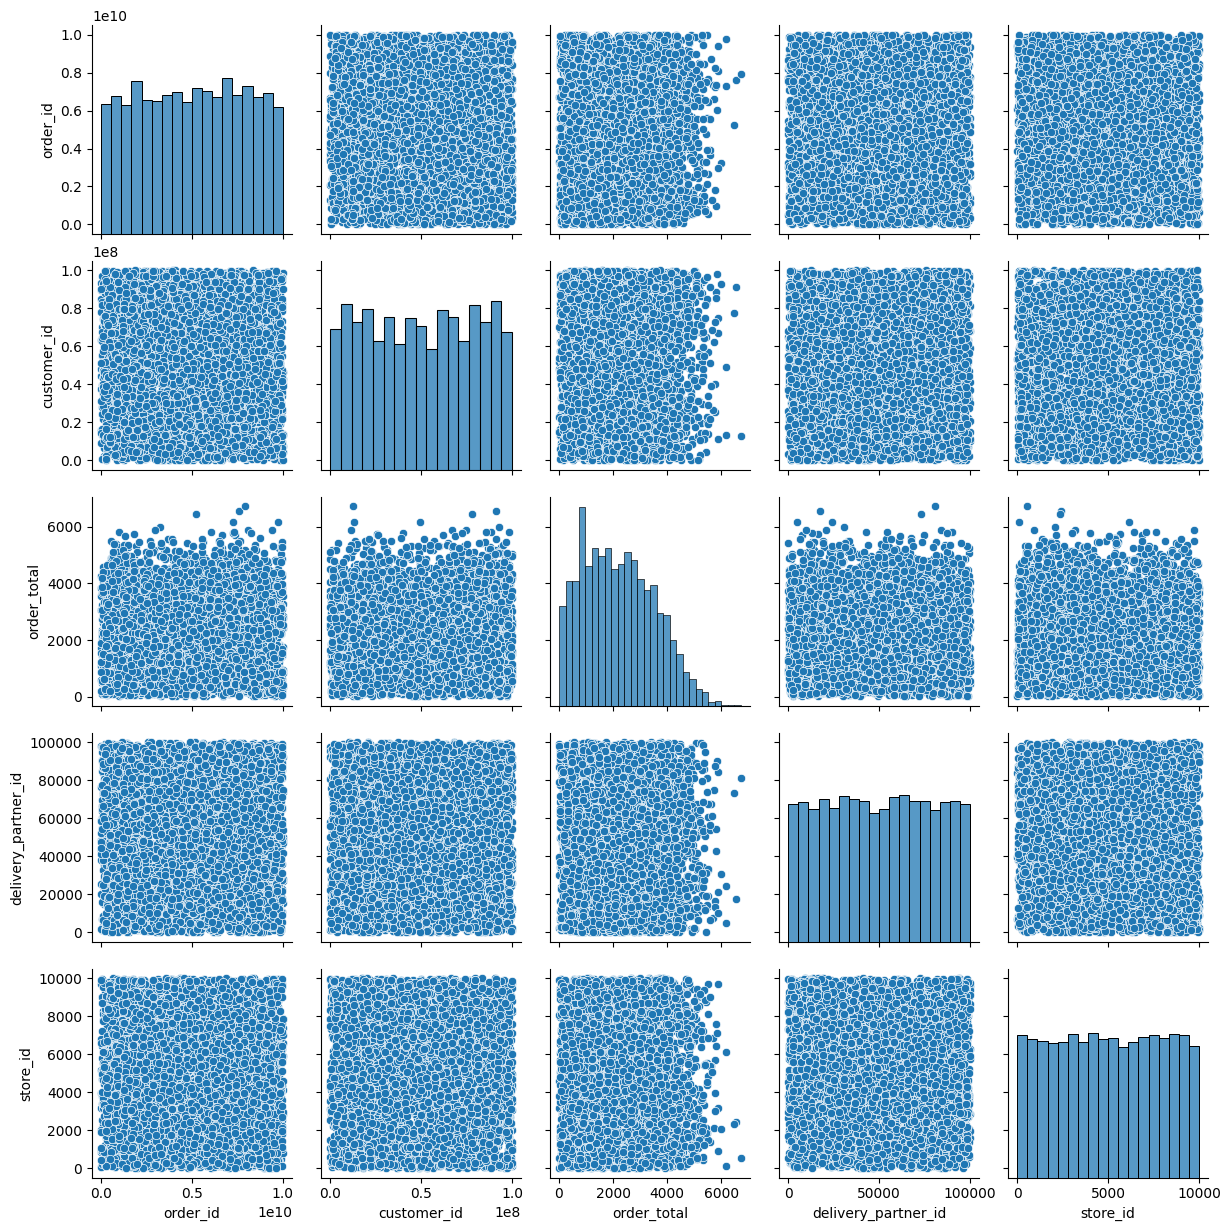

In [ ]:
sns.pairplot(numeric_col)
plt.show()

# SCATTER PLOT WITH CATEGORIES (PAYMENT METHOD & ORDER TOTAL)

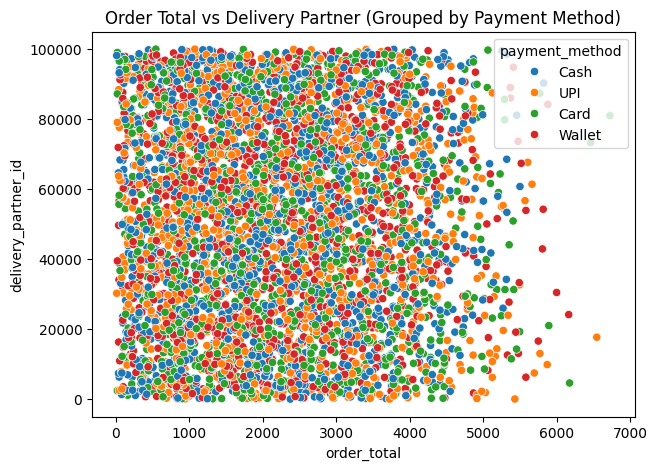

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=orders["order_total"], y=orders["delivery_partner_id"], hue=orders["payment_method"])
plt.title("Order Total vs Delivery Partner (Grouped by Payment Method)")
plt.show()


# STACKED COLUMN CHART: DELIVERY STATUS VS PAYMENT METHOD

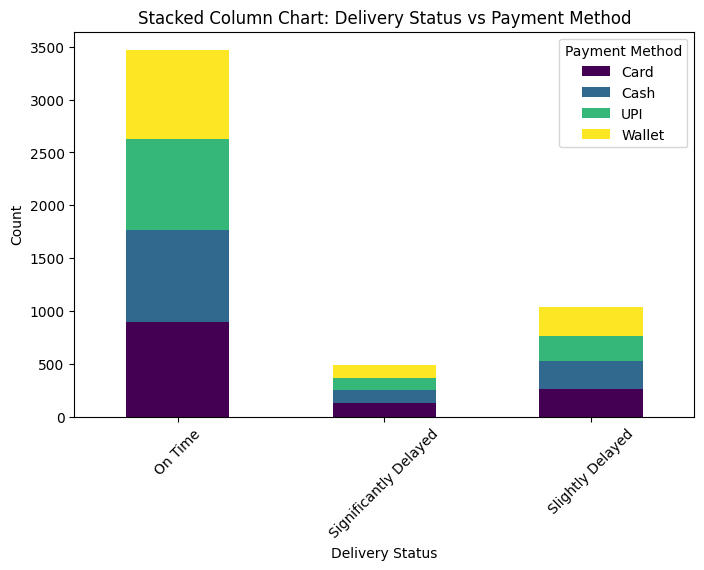

In [ ]:

stacked_data = orders.groupby(["delivery_status", "payment_method"]).size().unstack()

stacked_data.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

plt.xlabel("Delivery Status")
plt.ylabel("Count")
plt.title("Stacked Column Chart: Delivery Status vs Payment Method")
plt.legend(title="Payment Method")
plt.xticks(rotation=45)
plt.show()


# PROFILE PLOT

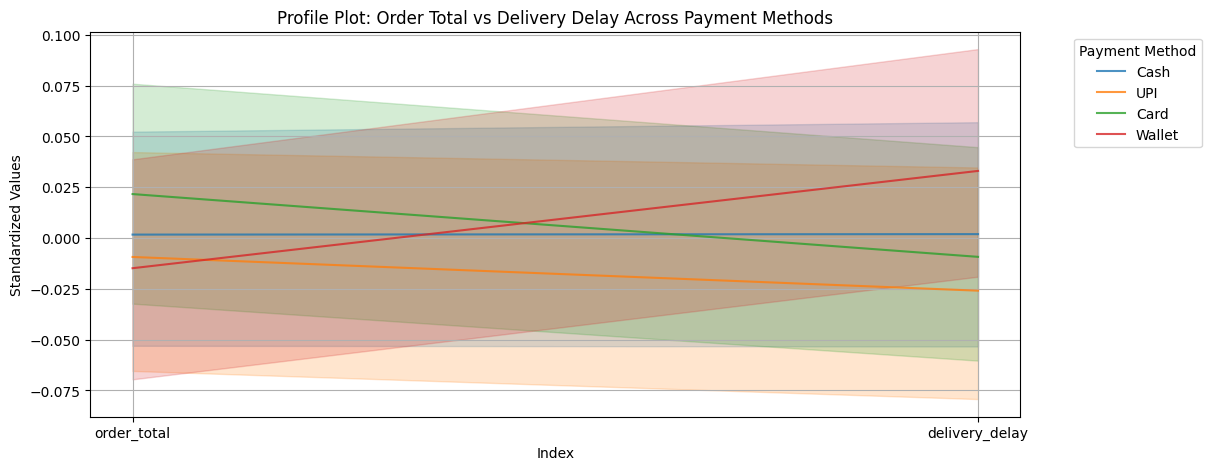

In [16]:
normalized_data_long = pd.melt(
    normalized_data,
    id_vars=["payment_method"],
    value_vars=["order_total", "delivery_delay"],
    var_name="Variable",
    value_name="Value" )

plt.figure(figsize=(12, 5))
sns.lineplot(
    data=normalized_data_long,
    x="Variable",
    y="Value",
    hue="payment_method",
    dashes=False,
    alpha=0.8,
    linewidth=1.5
)

plt.title("Profile Plot: Order Total vs Delivery Delay Across Payment Methods")
plt.xlabel("Index")
plt.ylabel("Standardized Values")
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()



# BOX PLOT

<ipython-input-10-edfe178ea945>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=orders["payment_method"], y=orders["order_total"], palette="Set2")


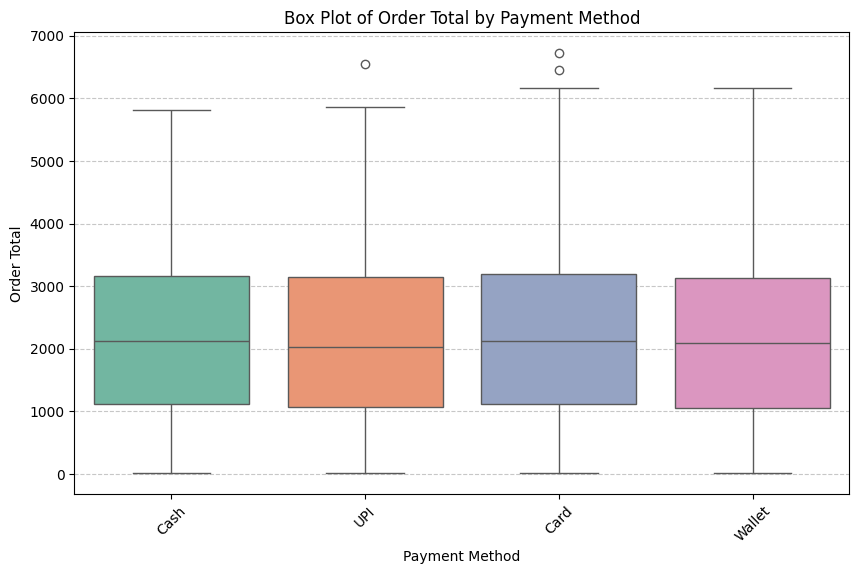

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=orders["payment_method"], y=orders["order_total"], palette="Set2")
plt.title("Box Plot of Order Total by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Order Total")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()